In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
circuits = pd.read_csv('archive/circuits.csv')
race = pd.read_csv('archive/races.csv')
status = pd.read_csv('archive/status.csv')
result = pd.read_csv('archive/results.csv')
world = pd.read_csv('countries.csv')
print(world.shape)
print(race.shape)
print(circuits.shape)
print(status.shape)
print(result.shape)
race.head()

(212, 8)
(1101, 18)
(77, 9)
(139, 2)
(26080, 18)


raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N       \N       \N         \N         \N   
1       \N       \N       \N       \N       \N         \N         \N   
2       \N       \N       \N       \N       \N         \N         \N   
3       \N       \N       \N       \N       \N         \N         \N   
4       \N       \N       \N       \N       \N         \N         \N   

  sprint_date sprint_time  
0          \N          \N  
1          \N          \N  
2          \N          \N  
3          \N          \N  
4          \N          \N

In [3]:
race['name'].unique()

array(['Australian Grand Prix', 'Malaysian Grand Prix',
       'Chinese Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix', 'Turkish Grand Prix', 'British Grand Prix',
       'German Grand Prix', 'Hungarian Grand Prix', 'European Grand Prix',
       'Belgian Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix',
       'Japanese Grand Prix', 'Brazilian Grand Prix',
       'Abu Dhabi Grand Prix', 'Canadian Grand Prix', 'French Grand Prix',
       'United States Grand Prix', 'San Marino Grand Prix',
       'Austrian Grand Prix', 'Argentine Grand Prix',
       'Luxembourg Grand Prix', 'Portuguese Grand Prix',
       'Pacific Grand Prix', 'South African Grand Prix',
       'Mexican Grand Prix', 'Korean Grand Prix', 'Detroit Grand Prix',
       'Dutch Grand Prix', 'Dallas Grand Prix',
       'United States Grand Prix West', 'Swiss Grand Prix',
       'Caesars Palace Grand Prix', 'Swedish Grand Prix',
       'Indianapolis 500', 'Moroccan Grand Prix', 'Pes

In [4]:
circuit_list = ['Australian Grand Prix', 'Malaysian Grand Prix',
       'Chinese Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix', 'Turkish Grand Prix', 'British Grand Prix',
       'German Grand Prix', 'Hungarian Grand Prix', 'European Grand Prix',
       'Belgian Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix',
       'Japanese Grand Prix', 'Brazilian Grand Prix',
       'Abu Dhabi Grand Prix', 'Canadian Grand Prix', 'French Grand Prix',
       'United States Grand Prix', 'San Marino Grand Prix',
       'Austrian Grand Prix', 'Argentine Grand Prix',
       'Luxembourg Grand Prix', 'Portuguese Grand Prix',
       'Pacific Grand Prix', 'South African Grand Prix',
       'Mexican Grand Prix', 'Korean Grand Prix', 'Detroit Grand Prix',
       'Dutch Grand Prix', 'Dallas Grand Prix',
       'United States Grand Prix West', 'Swiss Grand Prix',
       'Caesars Palace Grand Prix', 'Swedish Grand Prix',
       'Indianapolis 500', 'Moroccan Grand Prix', 'Pescara Grand Prix',
       'Indian Grand Prix', 'Russian Grand Prix', 'Azerbaijan Grand Prix',
       'Styrian Grand Prix', '70th Anniversary Grand Prix',
       'Tuscan Grand Prix', 'Eifel Grand Prix',
       'Emilia Romagna Grand Prix', 'Sakhir Grand Prix',
       'Qatar Grand Prix', 'Mexico City Grand Prix',
       'São Paulo Grand Prix', 'Saudi Arabian Grand Prix',
       'Miami Grand Prix', 'Las Vegas Grand Prix']


len(circuit_list)


54

In [5]:


short_result = result[['statusId','raceId','driverId', 'constructorId']]
short_circuit= circuits[['country', 'location', 'circuitId']]
short_race   = race[['raceId', 'circuitId', 'year']]  # Maybe without year
# status

first_set = pd.merge(short_result, short_race, on='raceId')
sec_set = pd.merge(first_set, short_circuit, on='circuitId')
third_set = pd.merge(sec_set, status, on='statusId')
third_set.head()
# third_set.shape

statusId  raceId  driverId  constructorId  circuitId  year    country  \
0         1      18         1              1          1  2008  Australia   
1         1      18         2              2          1  2008  Australia   
2         1      18         3              3          1  2008  Australia   
3         1      18         4              4          1  2008  Australia   
4         1      18         5              1          1  2008  Australia   

    location    status  
0  Melbourne  Finished  
1  Melbourne  Finished  
2  Melbourne  Finished  
3  Melbourne  Finished  
4  Melbourne  Finished

In [6]:
clean_race = race[['circuitId', 'raceId', 'name']]
clean_circ = circuits[['circuitId','circuitRef','country','location']]

In [7]:
places = pd.merge(clean_circ, clean_race, on='circuitId')
# because I had 'United States' and 'USA' I merged them into one name
places['country'].replace(value='United States', to_replace='USA')
places.head()

circuitId   circuitRef    country   location  raceId                   name
0          1  albert_park  Australia  Melbourne       1  Australian Grand Prix
1          1  albert_park  Australia  Melbourne      18  Australian Grand Prix
2          1  albert_park  Australia  Melbourne      36  Australian Grand Prix
3          1  albert_park  Australia  Melbourne      55  Australian Grand Prix
4          1  albert_park  Australia  Melbourne      71  Australian Grand Prix

In [8]:
# places.to_csv('places.csv')

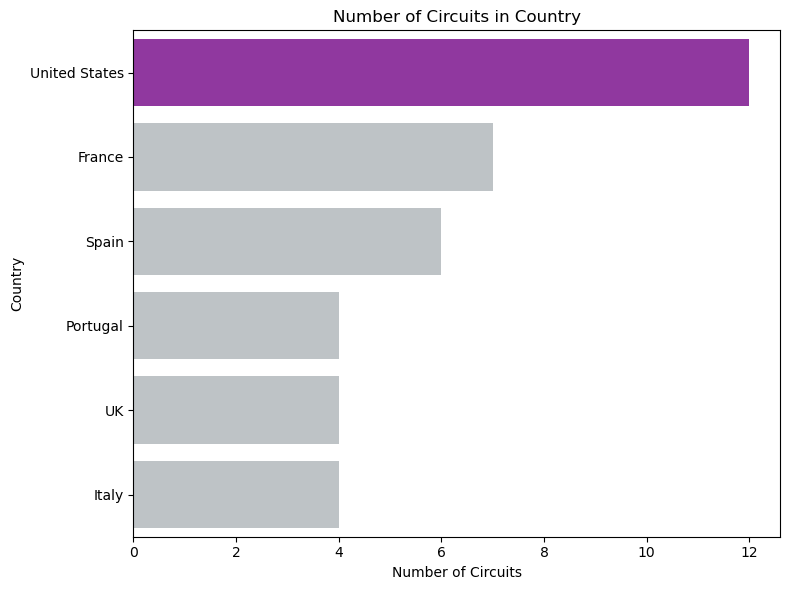

In [9]:
# because I had 'United States' and 'USA' I merged them into one name
circuit['country'].replace(value='United States', to_replace='USA')
colors=['#9C27B0','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7']#,'#58D68D','#AED6F1','#CB4335','#009B3A']
circ = circuits['country'].replace(value='United States', to_replace='USA').value_counts().head(6)
plt.figure(figsize=(8, 6))  # Set the figure size as needed
sns.barplot(x=circ.values, y=circ.index, palette=colors)
# circ.nlargest(6,'first').plot(kind='bar')
plt.title('Number of Circuits in Country')
plt.xlabel('Number of Circuits')
plt.ylabel('Country')
# plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

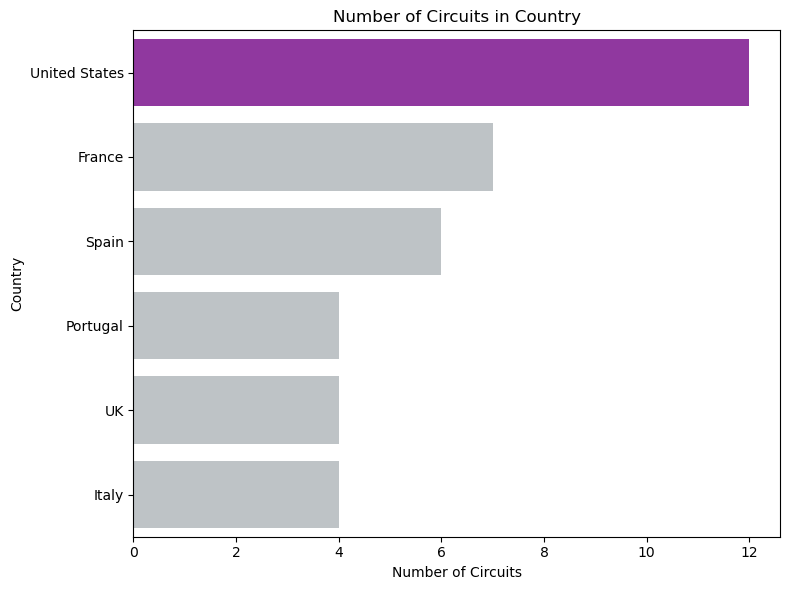

In [10]:
# because I had 'United States' and 'USA' I merged them into one name
 # places['country'].replace(value='United States', to_replace='USA')
colors=['#9C27B0','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7']#,'#A3E4D7','#A3E4D7','#A3E4D7','#A3E4D7']#,'#58D68D','#AED6F1','#CB4335','#009B3A']
circ = circuits['country'].replace(value='United States', to_replace='USA').value_counts().head(6)
plt.figure(figsize=(8, 6))  # Set the figure size as needed
sns.barplot(x=circ.values, y=circ.index, palette=colors)
# circ.nlargest(6,'first').plot(kind='bar')
plt.title('Number of Circuits in Country')
plt.xlabel('Number of Circuits')
plt.ylabel('Country')
# plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [11]:
circuits['country'].sort_values().head(100)


24        Argentina
0         Australia
28        Australia
56          Austria
69          Austria
          ...      
43              USA
42              USA
18              USA
76              USA
22    United States
Name: country, Length: 77, dtype: object

## Through the history, where the races happened most (by country)

In [12]:
# cir_by_country.to_csv('total_races.csv')

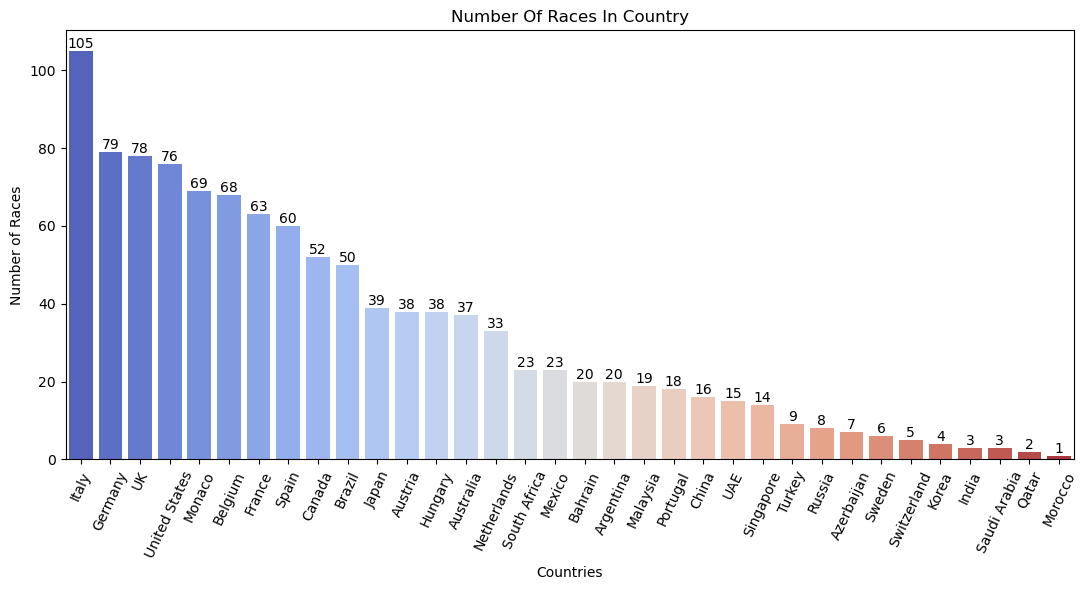

In [13]:
# because I had 'United States' and 'USA' I merged them into one name
cir_by_country = places['country'].replace(value='United States', to_replace='USA').value_counts()
# cir_by_country  
plt.figure(figsize=(11, 6))  # Set the figure size as needed
ax = sns.barplot(x=cir_by_country.index, y=cir_by_country.values, palette="coolwarm")
# cir_by_country.plot(kind='bar')
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Number Of Races In Country')
plt.xlabel('Countries')
plt.ylabel('Number of Races')
plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

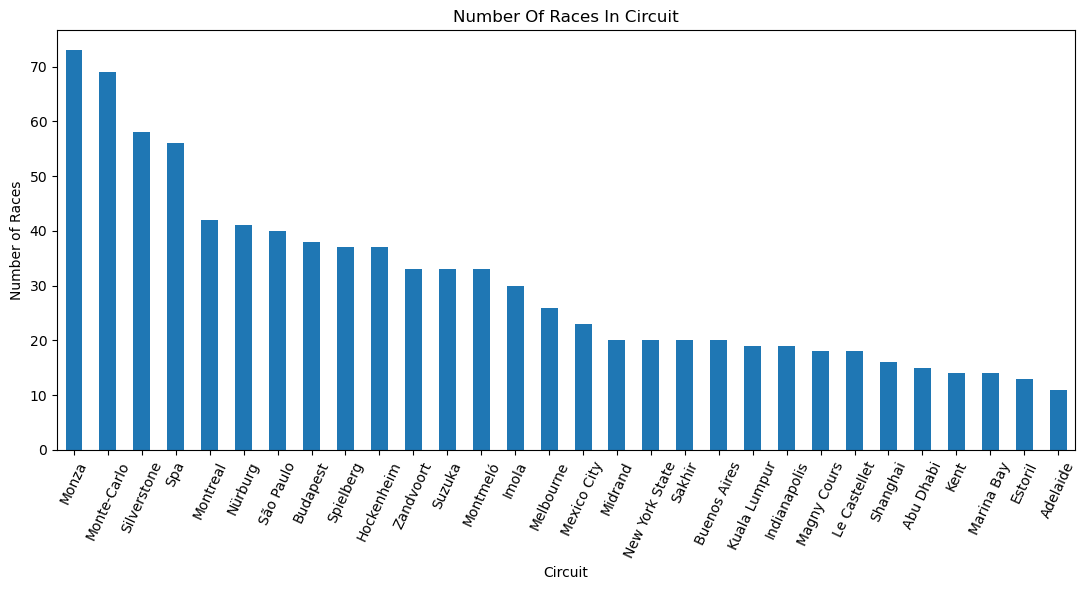

In [14]:
race_place_in_history =  places['location'].value_counts().head(30)
plt.figure(figsize=(11, 6))  # Set the figure size as needed
race_place_in_history.plot(kind='bar')

plt.title('Number Of Races In Circuit')
plt.xlabel('Circuit')
plt.ylabel('Number of Races')
plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [15]:
places['name'].value_counts()

name
British Grand Prix               74
Italian Grand Prix               74
Monaco Grand Prix                69
Belgian Grand Prix               68
German Grand Prix                64
French Grand Prix                62
Spanish Grand Prix               53
Canadian Grand Prix              52
Brazilian Grand Prix             48
United States Grand Prix         44
Hungarian Grand Prix             38
Japanese Grand Prix              37
Australian Grand Prix            37
Austrian Grand Prix              36
Dutch Grand Prix                 33
San Marino Grand Prix            26
European Grand Prix              23
South African Grand Prix         23
Mexican Grand Prix               20
Argentine Grand Prix             20
Bahrain Grand Prix               19
Malaysian Grand Prix             19
Portuguese Grand Prix            18
Chinese Grand Prix               16
Abu Dhabi Grand Prix             15
Singapore Grand Prix             14
Indianapolis 500                 11
Turkish Grand Prix     

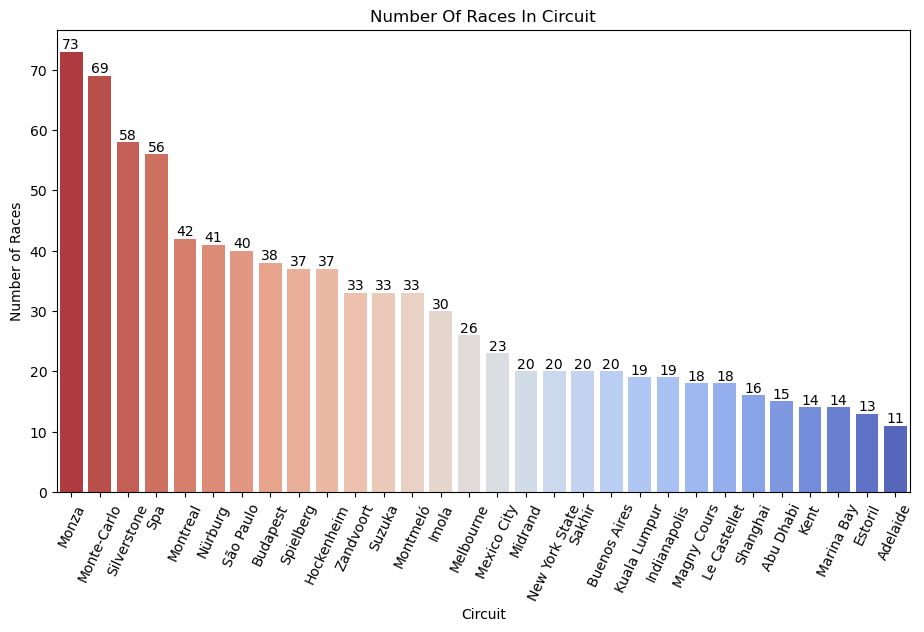

In [16]:
race_place_in_history =  places['location'].value_counts().head(30)

plt.figure(figsize=(11, 6))  # Set the figure size as needed

# Assuming 'ax' is the Axes object returned by sns.barplot or plt.bar
# and 'top_teams_names' is a pandas Series or similar with the count data
ax = sns.barplot(x=race_place_in_history.index, y=race_place_in_history.values, palette="coolwarm_r")
# plt.title('Top 20 Racing Teams Through History')
# plt.xlabel('Number of Races')
# plt.ylabel('Team Name')

# Adding the text on top of the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
# race_place_in_history.plot(kind='bar')
plt.title('Number Of Races In Circuit')
plt.xlabel('Circuit')
plt.ylabel('Number of Races')
plt.xticks(rotation=65)  # Rotate the country names for better readability
# plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [17]:
sorted_countries = places['country'].replace(value='United States', to_replace='USA').value_counts()
sorted_countries.head()

country
Italy            105
Germany           79
UK                78
United States     76
Monaco            69
Name: count, dtype: int64

In [18]:
places.head()

circuitId   circuitRef    country   location  raceId                   name
0          1  albert_park  Australia  Melbourne       1  Australian Grand Prix
1          1  albert_park  Australia  Melbourne      18  Australian Grand Prix
2          1  albert_park  Australia  Melbourne      36  Australian Grand Prix
3          1  albert_park  Australia  Melbourne      55  Australian Grand Prix
4          1  albert_park  Australia  Melbourne      71  Australian Grand Prix

## `I'm trying to group all the circuit in each country and show it on graph like I did wiwth the drivers points`

In [19]:
host_country = places.groupby('country')[['location']].count()#.sort_values(by='country', ascending=False).head()
host_country

location
country                
Argentina            20
Australia            37
Austria              38
Azerbaijan            7
Bahrain              20
Belgium              68
Brazil               50
Canada               52
China                16
France               63
Germany              79
Hungary              38
India                 3
Italy               105
Japan                39
Korea                 4
Malaysia             19
Mexico               23
Monaco               69
Morocco               1
Netherlands          33
Portugal             18
Qatar                 2
Russia                8
Saudi Arabia          3
Singapore            14
South Africa         23
Spain                60
Sweden                6
Switzerland           5
Turkey                9
UAE                  15
UK                   78
USA                  75
United States         1

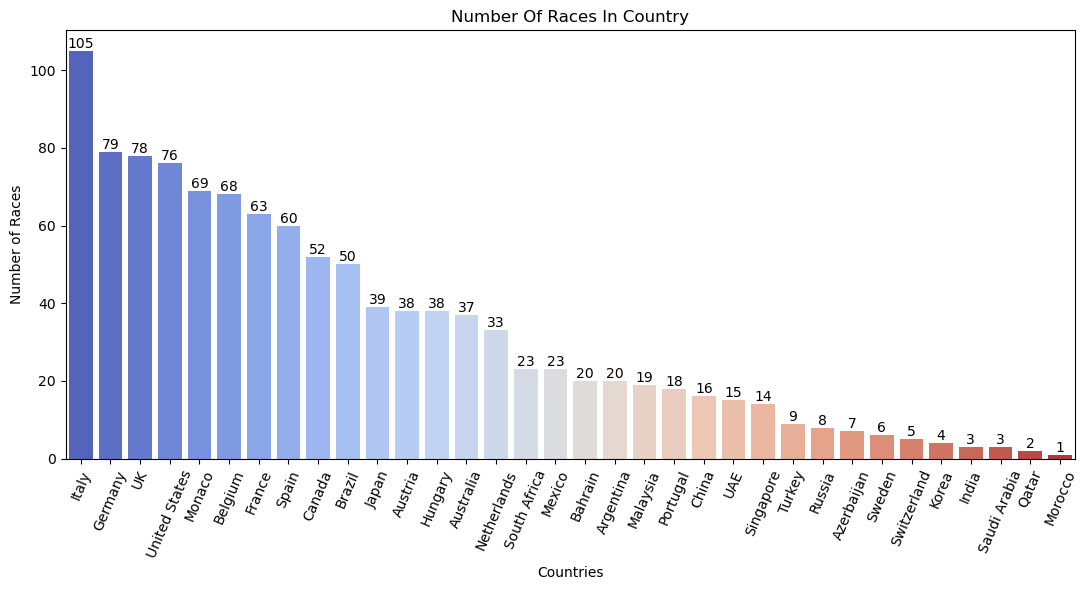

In [20]:
places['location'].replace(value='United States', to_replace='USA')


# because I had 'United States' and 'USA' I merged them into one name
cir_by_country = places['country'].replace(value='United States', to_replace='USA').value_counts()
# cir_by_country  
plt.figure(figsize=(11, 6))  # Set the figure size as needed
ax = sns.barplot(x=cir_by_country.index, y=cir_by_country.values, palette="coolwarm")
# cir_by_country.plot(kind='bar')
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Number Of Races In Country')
plt.xlabel('Countries')
plt.ylabel('Number of Races')
plt.xticks(rotation=67)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

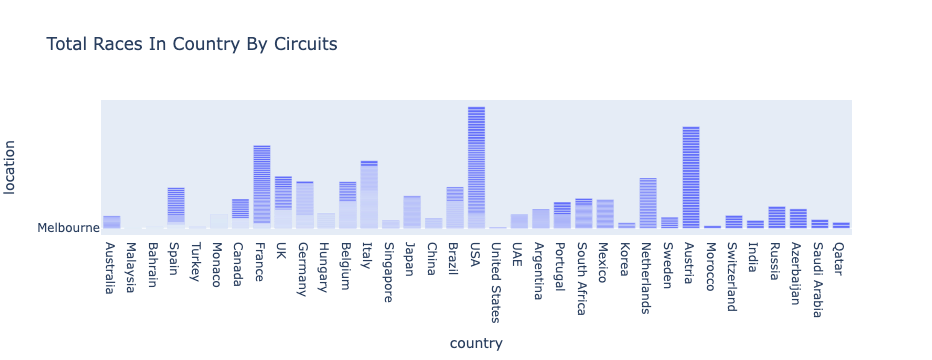

In [21]:
import plotly.express as px

fig = px.bar(places, x='country', y='location',
             title='Total Races In Country By Circuits')
fig.show()

In [22]:
grup = places[['country','name', 'circuitId']]
grup = grup.groupby('country')[['name']].count()
grup

name
country            
Argentina        20
Australia        37
Austria          38
Azerbaijan        7
Bahrain          20
Belgium          68
Brazil           50
Canada           52
China            16
France           63
Germany          79
Hungary          38
India             3
Italy           105
Japan            39
Korea             4
Malaysia         19
Mexico           23
Monaco           69
Morocco           1
Netherlands      33
Portugal         18
Qatar             2
Russia            8
Saudi Arabia      3
Singapore        14
South Africa     23
Spain            60
Sweden            6
Switzerland       5
Turkey            9
UAE              15
UK               78
USA              75
United States     1

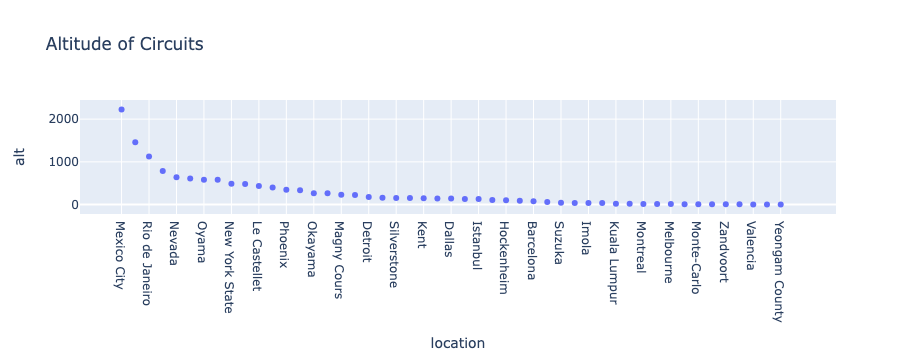

In [23]:
circuits['alt'] = pd.to_numeric(circuits['alt'], errors='coerce')
isitgood = circuits[['location', 'alt']].head(50).sort_values(by='alt', ascending=False)


figu = px.scatter(isitgood, x='location', y='alt', title='Altitude of Circuits')
figu.show()

/Users/tomerchoresh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/tomerchoresh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



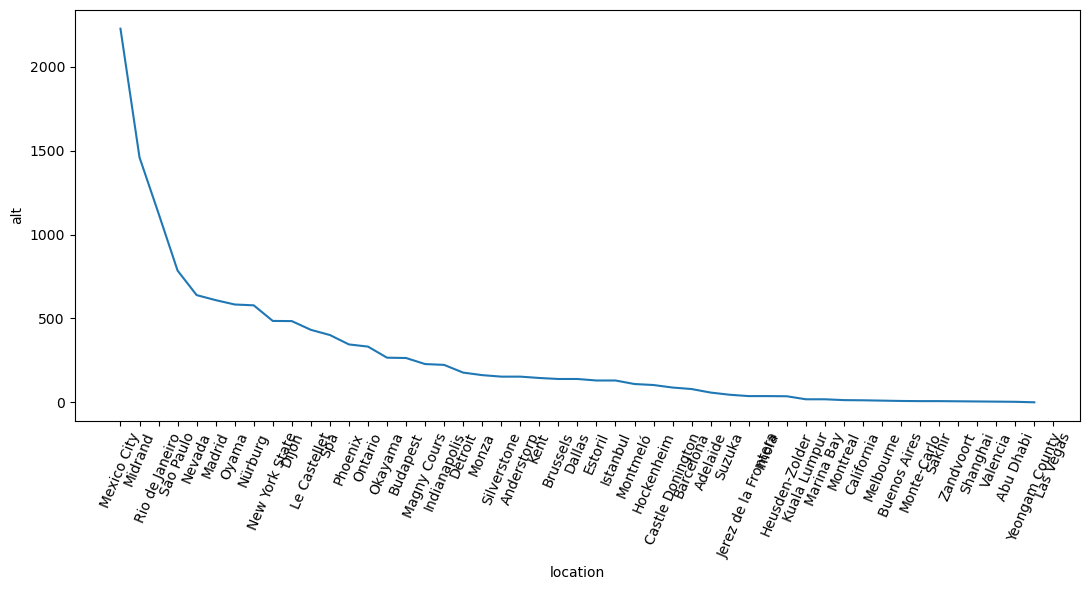

In [24]:
isitgood.head(20)
plt.figure(figsize=(11, 6))  # Set the figure size as needed

sns.lineplot(isitgood , x='location', y='alt')
plt.xticks(rotation=67)
plt.tight_layout()  # Adjust layout to fit all labels

plt.show()

Text(0, 0.5, 'Nationality')

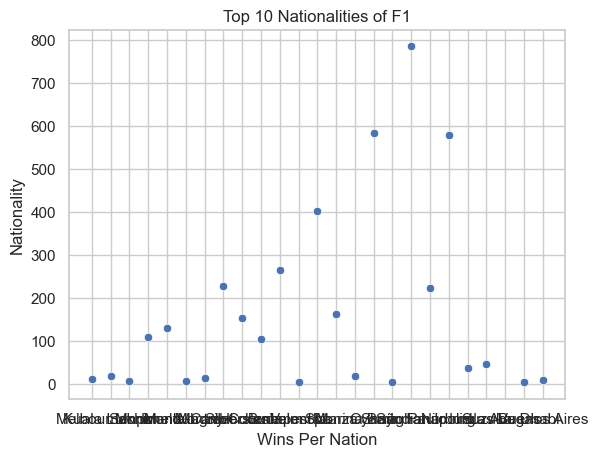

In [25]:
sns.set(style="whitegrid")
# fig, axes = plt.subplots(1, 1, figsize=(10, 6))

nationality_counts = circuits[['location', 'alt']].head(25)  # Top 10 nationalities
sns.scatterplot(nationality_counts, x='location', y='alt')#, ax=axes[0])
plt.title('Top 10 Nationalities of F1')
plt.xlabel('Wins Per Nation')
plt.ylabel('Nationality')


# top_5_nationalities = circuits[['location', 'alt']].tail(25)
# sns.scatterplot(top_5_nationalities, x='location', y='alt', palette="viridis", ax=axes[0])
# axes[1].(x='location', y='alt', palette="viridis", ax=axes[0])
# axes[1].set_title('Top 5 Nationalities Win points of F1 (Drivers)')

In [26]:
third_set.head()
# third_set.shape

statusId  raceId  driverId  constructorId  circuitId  year    country  \
0         1      18         1              1          1  2008  Australia   
1         1      18         2              2          1  2008  Australia   
2         1      18         3              3          1  2008  Australia   
3         1      18         4              4          1  2008  Australia   
4         1      18         5              1          1  2008  Australia   

    location    status  
0  Melbourne  Finished  
1  Melbourne  Finished  
2  Melbourne  Finished  
3  Melbourne  Finished  
4  Melbourne  Finished

In [27]:
# third_set.groupby('raceId')[['driverId','status','location']].count().head(20)

In [28]:
# third_set.groupby('status').describe()
third_set.status.value_counts().head(10)

status
Finished           7246
+1 Lap             3894
Engine             2016
+2 Laps            1598
Accident           1048
Did not qualify    1025
Collision           838
Gearbox             805
Spun off            792
+3 Laps             731
Name: count, dtype: int64

In [29]:

replacments = {'United Kingdom':'UK', 
               'United States':'USA',
               'United Arab Emirates': 'UAE',
               'South Korea': 'Korea'}
# rename the country and continent to lowercase merge the right column name (from world DF)
# ###### constructors['country'] = constructors['nationality'].map(nationality_to_country)
accident = third_set.query('status == "Accident" or status == "Collision" or status == "Fatal accident"') #filter by rows
accident['country'].replace(replacments).unique()
world = world.rename(columns={'Country': 'country', 'Continent': 'continent'})
world['country'] = world['country'].replace(replacments)
# new_table['country'].unique()
# new_world['country'] = world['country'].replace(replacments)
hello = world[['country', 'continent','Population', 'GDP_per_capita']]
new_table = pd.merge(accident, hello, on='country')
new_table['country'].value_counts()
# hello.head()


country
Monaco          191
USA             187
Germany         146
Belgium         144
Italy           134
UK              115
Canada          109
Brazil          102
Australia       100
Spain            90
Japan            65
Austria          64
France           61
Netherlands      52
Hungary          51
Argentina        39
South Africa     38
Singapore        30
Portugal         24
Mexico           18
China            16
Malaysia         15
Russia           14
Bahrain          13
Korea            13
Azerbaijan       12
UAE              11
Sweden            8
Switzerland       7
Turkey            5
India             5
Saudi Arabia      5
Morocco           5
Name: count, dtype: int64

In [30]:
accident.tail(50)

statusId  raceId  driverId  constructorId  circuitId  year  \
14995         3     742       394              6         58  1961   
14996         3     742       481            172         58  1961   
14997         3     760       567            105         58  1959   
14998         3     780       547            105         58  1957   
14999         3     753       432            167         59  1960   
15000         3     753       403              6         59  1960   
15001         3     755       341             32         60  1960   
15002         3     761       478             66         61  1959   
15003         3     762       403              6         62  1959   
15004         3     762       289             32         62  1959   
15005         3     764       575            125         63  1959   
15006         3     775       590            118         64  1958   
15007         3     775       604             87         64  1958   
15008         3     775       605             87         64  1958   
15009         3     775       482              6         64  1958   
15010         3     775       455             87         64  1958   
15011         3     782       456             87         65  1957   
15012         3     782       547            105         65  1957   
15013         3     805       626              6         66  1954   
15014         3     817       627              6         66  1952   
15015         3     825       687              6         66  1951   
15016         3     825       765            154         66  1951   
15017         3     825       633              6         66  1951   
15018         3     836       789            154         66  1950   
15019         3     836       704            154         66  1950   
15020         3     807       581            118         67  1954   
15021         3     832       660            154         67  1951   
15022         3     832       704            154         67  1951   
15023         3     353       808              4         35  2010   
15024         3     353       810            166         35  2010   
15025         3     353        17              9         35  2010   
15026         3     876        37            164         68  2012   
15027         3     876       815             15         68  2012   
15028         3     898        16             10         69  2013   
15029         3     942       826              9         69  2015   
15030         3     942       807             10         69  2015   
15031         3     941       154            208         71  2015   
15032         3    1040       832              1         71  2020   
15033         3    1066       849              3         71  2021   
15034         3     976       807              4         73  2017   
15035         3     992       154            210         73  2018   
15036         3     992       807              4         73  2018   
15037         3    1057       830              9         73  2021   
15038         3    1057       840            117         73  2021   
15039         3    1101       856            213         73  2023   
15040         3    1072       854            210         77  2021   
15041         3    1075       849              3         77  2022   
25966       104     474       204             45          7  1982   
25967       104     652       358             32         14  1970   
25968       104     604       324             63         46  1974   

            country        location          status  
14995            UK       Liverpool        Accident  
14996            UK       Liverpool        Accident  
14997            UK       Liverpool        Accident  
14998            UK       Liverpool        Accident  
14999      Portugal          Oporto        Accident  
15000      Portugal          Oporto        Accident  
15001           USA      California        Accident  
15002       Germany          Berlin        Accident  
1

In [31]:
# driver_wins = merged_df.groupby('surname')[['points']].sum().sort_values(by='points', ascending=False).head(23)

grouped_table = new_table.groupby('continent')[['country']].value_counts()
cont_count = grouped_table.reset_index(name='total')
cont_count.sort_values('total', ascending=False, inplace=True)

In [32]:
# driver_wins = merged_df.groupby('surname')[['points']].sum().sort_values(by='points', ascending=False).head(23)
# another try




grouped_table = new_table.groupby('country')[['location']].value_counts()
accidents_location = grouped_table.reset_index(name='total')
accidents_location.sort_values('total', ascending=False, inplace=True)

In [33]:
accidents_location.head()
accidents_location.to_csv('accidents_location.csv')

In [34]:
cont_count.head()

continent  country  total
11         Europe   Monaco    191
27  North America      USA    187
12         Europe  Germany    146
13         Europe  Belgium    144
14         Europe    Italy    134

In [35]:
# cont_count.to_csv('cont_count.csv')

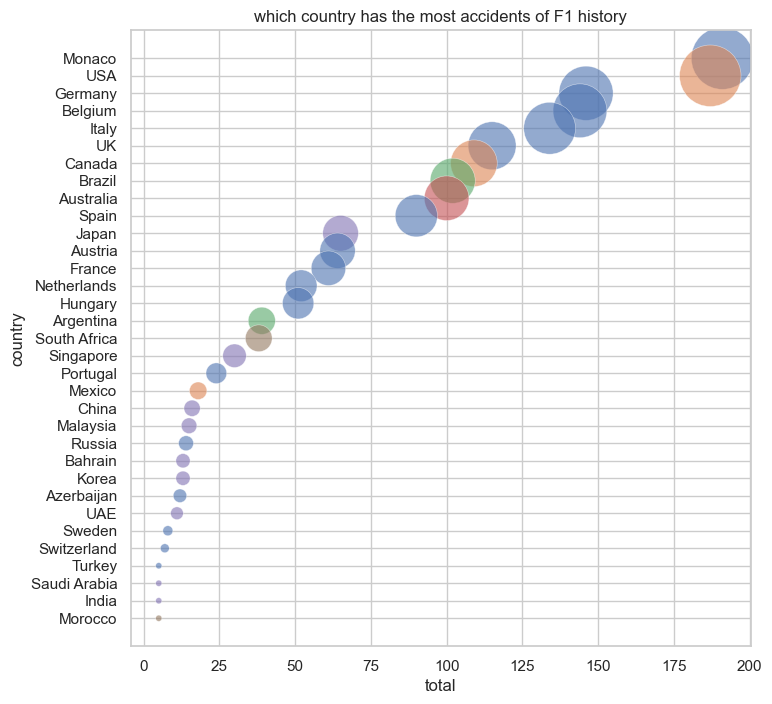

In [36]:
# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = (8, 8)

# use the scatterplot function to build the bubble map
sns.scatterplot(data=cont_count, 
                x="total", 
                y="country", 
                size='total', 
                hue='continent',
                legend=False,
                alpha=0.6,
                sizes=(20, 2000)),
plt.title('which country has the most accidents of F1 history')

# show the graph
plt.show()

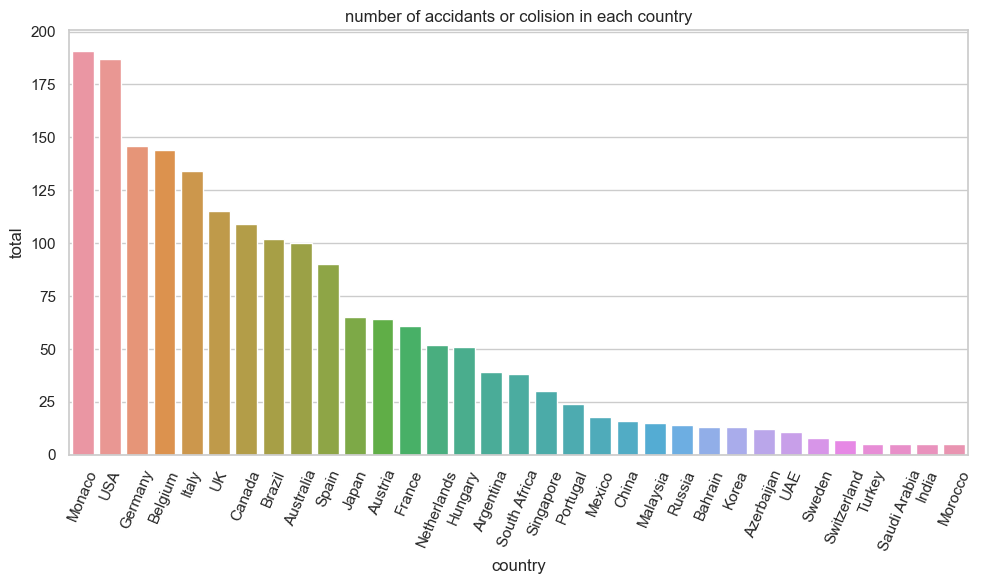

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(cont_count, x='country', y='total')
plt.title('number of accidants or colision in each country')
plt.xticks(rotation=67)
plt.tight_layout()  # Adjust layout to fit all labels

In [38]:
# places.replace(value='United States', to_replace='USA')
circuit_continent = pd.merge(places, hello, on='country')
print(circuit_continent.shape)
circuit_continent['country'].unique()
circuit_continent.head()

(1100, 9)


circuitId   circuitRef    country   location  raceId  \
0          1  albert_park  Australia  Melbourne       1   
1          1  albert_park  Australia  Melbourne      18   
2          1  albert_park  Australia  Melbourne      36   
3          1  albert_park  Australia  Melbourne      55   
4          1  albert_park  Australia  Melbourne      71   

                    name continent  Population  GDP_per_capita  
0  Australian Grand Prix   Oceania    26439.11         69154.9  
1  Australian Grand Prix   Oceania    26439.11         69154.9  
2  Australian Grand Prix   Oceania    26439.11         69154.9  
3  Australian Grand Prix   Oceania    26439.11         69154.9  
4  Australian Grand Prix   Oceania    26439.11         69154.9

In [39]:
print(places.shape)
places
# I think I have a problem here #

(1101, 6)


circuitId   circuitRef       country   location  raceId  \
0             1  albert_park     Australia  Melbourne       1   
1             1  albert_park     Australia  Melbourne      18   
2             1  albert_park     Australia  Melbourne      36   
3             1  albert_park     Australia  Melbourne      55   
4             1  albert_park     Australia  Melbourne      71   
...         ...          ...           ...        ...     ...   
1096         77       jeddah  Saudi Arabia     Jeddah    1099   
1097         78       losail         Qatar  Al Daayen    1051   
1098         78       losail         Qatar  Al Daayen    1115   
1099         79        miami           USA      Miami    1078   
1100         79        miami           USA      Miami    1102   

                          name  
0        Australian Grand Prix  
1        Australian Grand Prix  
2        Australian Grand Prix  
3        Australian Grand Prix  
4        Australian Grand Prix  
...                        ...  
1096  Saudi Arabian Grand Prix  
1097          Qatar Grand Prix  
1098          Qatar Grand Prix  
1099          Miami Grand Prix  
1100          Miami Grand Prix  

[1101 rows x 6 columns]

In [40]:
# driver_wins = merged_df.groupby('surname')[['points']].sum().sort_values(by='points', ascending=False).head(23)

cc_grouped_table = circuit_continent.groupby('continent')[['country']].value_counts()
circuit_count = cc_grouped_table.reset_index(name='total')
circuit_count.head()

continent       country  total
0    Africa  South Africa     23
1    Africa       Morocco      1
2      Asia         Japan     39
3      Asia       Bahrain     20
4      Asia      Malaysia     19

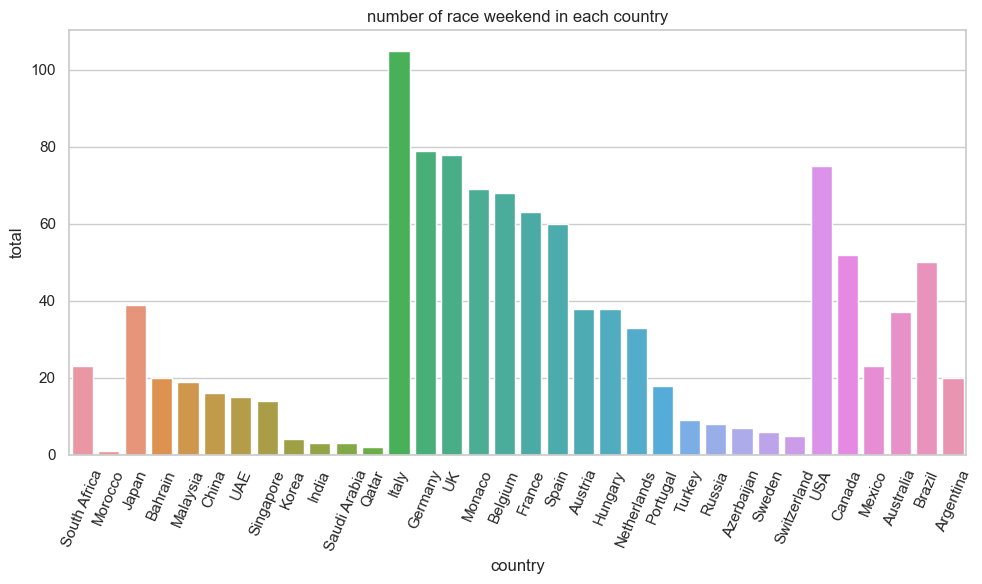

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(circuit_count, x='country', y='total')
plt.title('number of race weekend in each country')
plt.xticks(rotation=67)
plt.tight_layout()  # Adjust layout to fit all labels

# Number of circuit in country

In [42]:
circuit_continent.head(2)

circuitId   circuitRef    country   location  raceId  \
0          1  albert_park  Australia  Melbourne       1   
1          1  albert_park  Australia  Melbourne      18   

                    name continent  Population  GDP_per_capita  
0  Australian Grand Prix   Oceania    26439.11         69154.9  
1  Australian Grand Prix   Oceania    26439.11         69154.9

In [43]:
grouped = circuit_continent.groupby('circuitRef')[['circuitRef', 'country','location', 'continent']].value_counts()
host_country = grouped.reset_index(name='total')
host_country.sort_values('total', ascending=False, inplace=True)

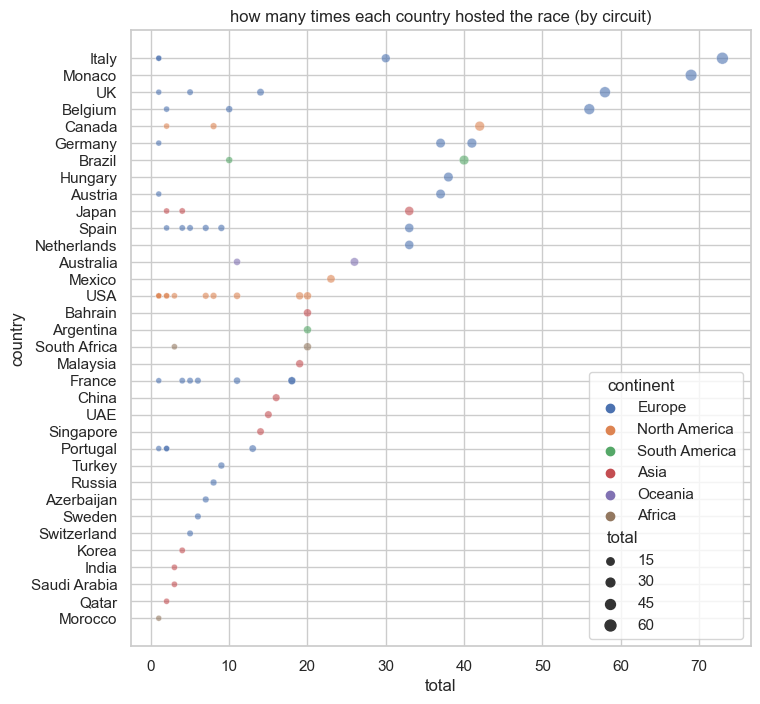

In [44]:
# Control figure size for this notebook:

plt.rcParams['figure.figsize'] = (8, 8)

# use the scatterplot function to build the bubble map
sns.scatterplot(data=host_country, 
                x="total", 
                y="country", 
                size='total', 
                hue='continent',
                legend=True,
                alpha=0.6,)
                # sizes=(20, 2000), )
plt.title('how many times each country hosted the race (by circuit)')
# show the graph
plt.show()

In [45]:
grouped = circuit_continent.groupby('circuitRef')[['circuitRef', 'country','location', 'continent', 'Population', 'GDP_per_capita']].value_counts()
host_country = grouped.reset_index(name='total')
host_country.sort_values('total', ascending=False, inplace=True)
circuit_continent.head()

circuitId   circuitRef    country   location  raceId  \
0          1  albert_park  Australia  Melbourne       1   
1          1  albert_park  Australia  Melbourne      18   
2          1  albert_park  Australia  Melbourne      36   
3          1  albert_park  Australia  Melbourne      55   
4          1  albert_park  Australia  Melbourne      71   

                    name continent  Population  GDP_per_capita  
0  Australian Grand Prix   Oceania    26439.11         69154.9  
1  Australian Grand Prix   Oceania    26439.11         69154.9  
2  Australian Grand Prix   Oceania    26439.11         69154.9  
3  Australian Grand Prix   Oceania    26439.11         69154.9  
4  Australian Grand Prix   Oceania    26439.11         69154.9

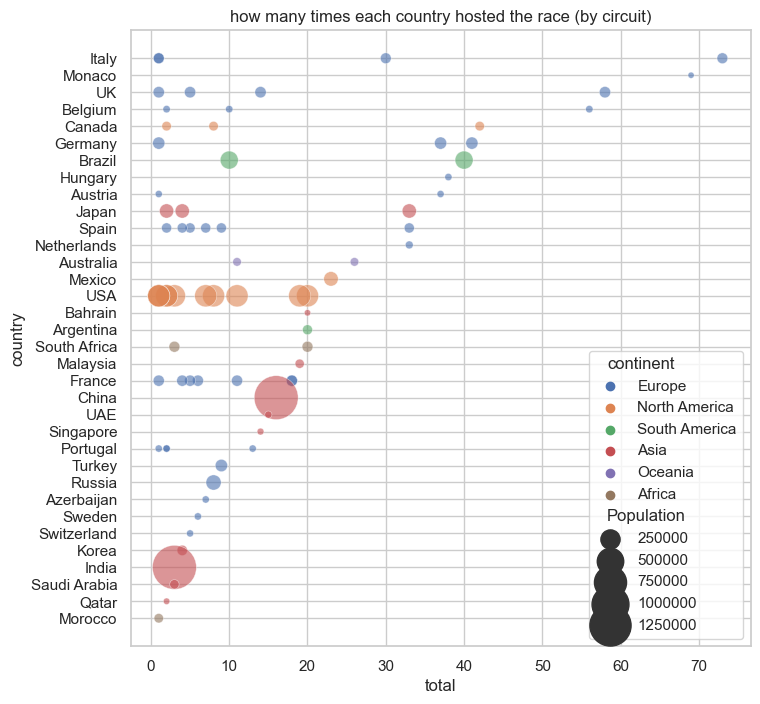

In [46]:
# Control figure size for this notebook:

plt.rcParams['figure.figsize'] = (8, 8)

# use the scatterplot function to build the bubble map
sns.scatterplot(data=host_country, 
                x="total", 
                y="country", 
                size='Population', 
                hue='continent',
                legend=True,
                alpha=0.6,
                sizes=(20, 1000) )
plt.title('how many times each country hosted the race (by circuit)')
# show the graph
plt.show()

In [47]:
# throwing away all the status that had '+' sign in it, so I don't have the overlap data as reason for technical issue
clean_status = status[~status['status'].str.contains('\+|Finished', regex=True)]
clean_status.value_counts()

statusId  status          
2         Disqualified        1
71        Fuel rig            1
96        Excluded            1
95        Fuel leak           1
94        Oil pump            1
                             ..
43        Exhaust             1
42        Heat shield fire    1
41        Broken wing         1
40        Electronics         1
141       Cooling system      1
Name: count, Length: 105, dtype: int64

In [48]:
# Trying to collect all the misstakes made by the teams/ drivers and show it by circuit.
# And which circuit is the most dangerous.

crazy_mistake = pd.merge(sec_set, clean_status, on='statusId')
crazy_mistake.columns
crazy_mistake.groupby('circuitId')['status'].value_counts()#[[]]

crazy_mistake.sort_values('circuitId', ascending=False, inplace=True)
crazy_mistake.head(2)

statusId  raceId  driverId  constructorId  circuitId  year country  \
2853         4    1078       846              1         79  2022     USA   
9102        47    1078       855             51         79  2022     USA   

     location      status  
2853    Miami   Collision  
9102    Miami  Water leak

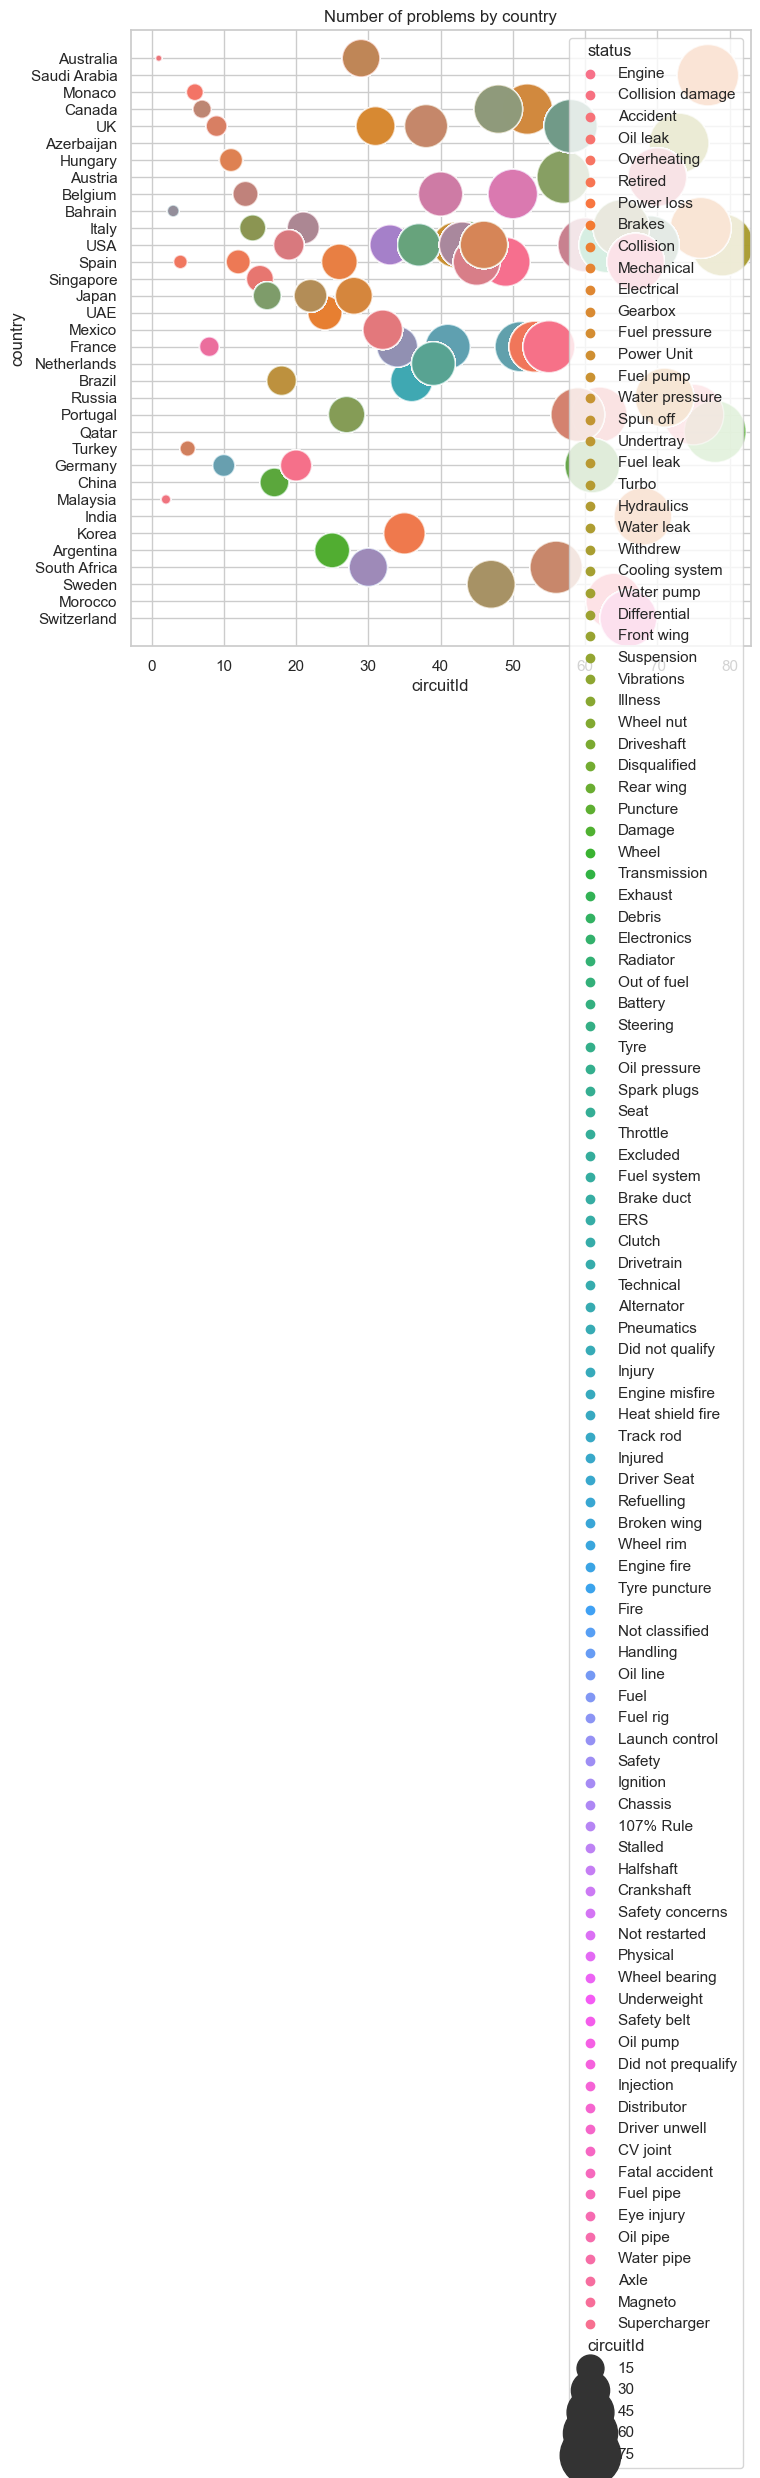

In [49]:
crazy_mistake.sort_values('year', ascending=False, inplace=True)

# Control figure size for this notebook:

plt.rcParams['figure.figsize'] = (8, 8)

# use the scatterplot function to build the bubble map
sns.scatterplot(data=crazy_mistake, 
                x="circuitId", 
                y="country", 
                size='circuitId', 
                hue='status',
                legend=True,
                alpha=0.5,
                sizes=(20, 2000))
plt.title('Number of problems by country')
# show the graph
plt.show()

In [50]:
full_accident = pd.merge(accident, world, on='country')
full_accident.columns

Index(['statusId', 'raceId', 'driverId', 'constructorId', 'circuitId', 'year',
       'country', 'location', 'status', 'Rank', 'ID', 'continent',
       'Population', 'IMF_GDP', 'UN_GDP', 'GDP_per_capita'],
      dtype='object')

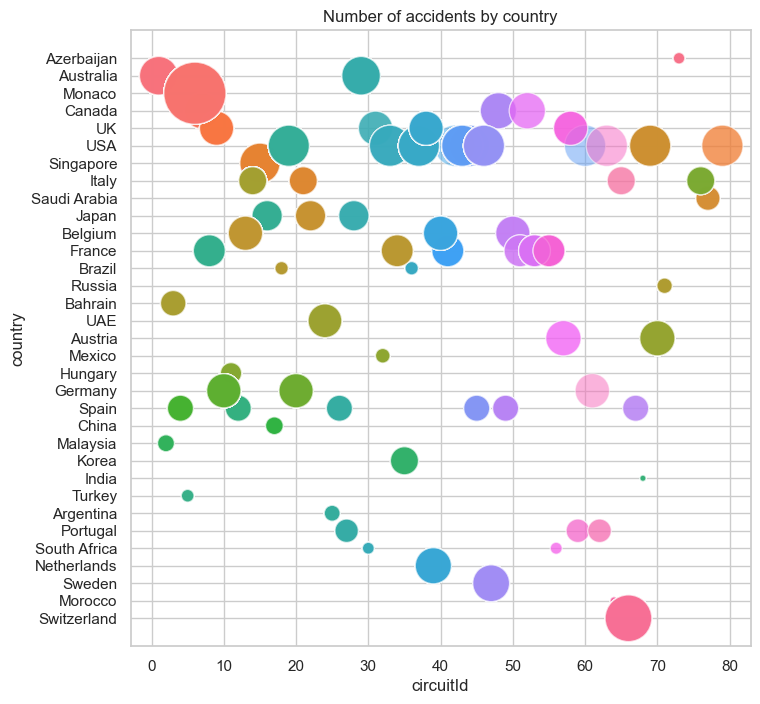

In [51]:
full_accident.sort_values('year', ascending=False, inplace=True)

# Control figure size for this notebook:

plt.rcParams['figure.figsize'] = (8, 8)

# use the scatterplot function to build the bubble map
sns.scatterplot(data=full_accident, 
                x="circuitId", 
                y="country", 
                size='GDP_per_capita', 
                hue='location',
                legend=False,
                alpha=0.5,
                sizes=(20, 2000))
plt.title('Number of accidents by country')
# show the graph
plt.show()

In [52]:
# full_accident_grouped = full_accident.groupby(['year', 'GDP_per_capita', 'Population', 'continent', 'status', 'country']).count()
# full_accident_grouped.reset_index()
# full_accident_grouped.head()


In [53]:
# # Grouping by 'raceId' and getting the count of occurrences per raceId
# grouped_by_race = full_accident.groupby('year').size()
# # full_accident.sort_values('year', ascending=False, inplace=True)

# # Control figure size for this notebook:

# plt.rcParams['figure.figsize'] = (8, 8)

# # use the scatterplot function to build the bubble map
# sns.scatterplot(data=grouped_by_race, 
#                 x="circuitId", 
#                 y="country", 
#                 size='GDP_per_capita', 
#                 hue='location',
#                 legend=False,
#                 alpha=0.5,
#                 sizes=(20, 2000))
# plt.title('Number of accidents by country')
# # show the graph
# plt.show()

In [54]:
san_marino = race.query('name == "San Marino Grand Prix"')
san_marino

raceId  year  round  circuitId                   name        date  \
55       56  2006      4         21  San Marino Grand Prix  2006-04-23   
73       74  2005      4         21  San Marino Grand Prix  2005-04-24   
92       93  2004      4         21  San Marino Grand Prix  2004-04-25   
110     111  2003      4         21  San Marino Grand Prix  2003-04-20   
126     127  2002      4         21  San Marino Grand Prix  2002-04-14   
143     144  2001      4         21  San Marino Grand Prix  2001-04-15   
159     160  2000      3         21  San Marino Grand Prix  2000-04-09   
176     177  1999      3         21  San Marino Grand Prix  1999-05-02   
193     194  1998      4         21  San Marino Grand Prix  1998-04-26   
209     210  1997      4         21  San Marino Grand Prix  1997-04-27   
227     228  1996      5         21  San Marino Grand Prix  1996-05-05   
241     242  1995      3         21  San Marino Grand Prix  1995-04-30   
258     259  1994      3         21  San Marino Grand Prix  1994-05-01   
275     276  1993      4         21  San Marino Grand Prix  1993-04-25   
292     293  1992      5         21  San Marino Grand Prix  1992-05-17   
306     307  1991      3         21  San Marino Grand Prix  1991-04-28   
322     323  1990      3         21  San Marino Grand Prix  1990-05-13   
356     357  1989      2         21  San Marino Grand Prix  1989-04-23   
372     373  1988      2         21  San Marino Grand Prix  1988-05-01   
388     389  1987      2         21  San Marino Grand Prix  1987-05-03   
405     406  1986      3         21  San Marino Grand Prix  1986-04-27   
421     422  1985      3         21  San Marino Grand Prix  1985-05-05   
438     439  1984      4         21  San Marino Grand Prix  1984-05-06   
454     455  1983      4         21  San Marino Grand Prix  1983-05-01   
469     470  1982      4         21  San Marino Grand Prix  1982-04-25   
485     486  1981      4         21  San Marino Grand Prix  1981-05-03   

         time                                                url fp1_date  \
55   14:00:00  http://en.wikipedia.org/wiki/2006_San_Marino_G...       \N   
73   14:00:00  http://en.wikipedia.org/wiki/2005_San_Marino_G...       \N   
92         \N  http://en.wikipedia.org/wiki/2004_San_Marino_G...       \N   
110        \N  http://en.wikipedia.org/wiki/2003_San_Marino_G...       \N   
126        \N  http://en.wikipedia.org/wiki/2002_San_Marino_G...       \N   
143        \N  http://en.wikipedia.org/wiki/2001_San_Marino_G...       \N   
159        \N  http://en.wikipedia.org/wiki/2000_San_Marino_G...       \N   
176        \N  http://en.wikipedia.org/wiki/1999_San_Marino_G...       \N   
193        \N  http://en.wikipedia.org/wiki/1998_San_Marino_G...       \N   
209        \N  http://en.wikipedia.org/wiki/1997_San_Marino_G...       \N   
227        \N  http://en.wikipedia.org/wiki/1996_San_Marino_G...       \N   
241        \N  http://en.wikipedia.org/wiki/1995_San_Marino_G...       \N   
258        \N  http://en.wikipedia.org/wiki/1994_San_Marino_G...       \N   
275        \N  http://en.wikipedia.org/wiki/1993_San_Marino_G...       \N   
292        \N  http://en.wikipedia.org/wiki/1992_San_Marino_G...       \N   
306        \N  http://en.wikipedia.org/wiki/1991_San_Marino_G...       \N   
322        \N  http://en.wikipedia.org/wiki/1990_San_Marino_G...       \N   
356        \N  http://en.wikipedia.org/wiki/1989_San_Marino_G...       \N   
372        \N  http://en.wikipedia.org/wiki/1988_San_Marino_G...       \N   
388        \N  http://en.wikipedia.org/wiki/1987_San_Marino_G...       \N   
405        \N  http://en.wikipedia.org/wiki/1986_San_Marino_G...       \N   
421        \N  http://en.wikipedia.org/wiki/1985_San_Marino_G...       \N   
438        \N  http://en.wikipedia.org/wiki/1984_San_Marino_G...       \N   
454        \N  http://en.wikipedia.org/wiki/1983_San_Marino_G...       \N   
469        \N  http://en.wikipedia.org/wiki/1982_San_Marino_G...       \N   
485 